In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
work=pd.read_csv('Absenteeism_at_work.csv')
work.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df=pd.DataFrame(data=work)
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Hit target', 'Disciplinary failure',
        'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
        'Height', 'Body mass index', 'Absenteeism time in hours'],
       dtype='object'),
 dtype('float64'): Index(['Work load Average/day'], dtype='object')}

In [8]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


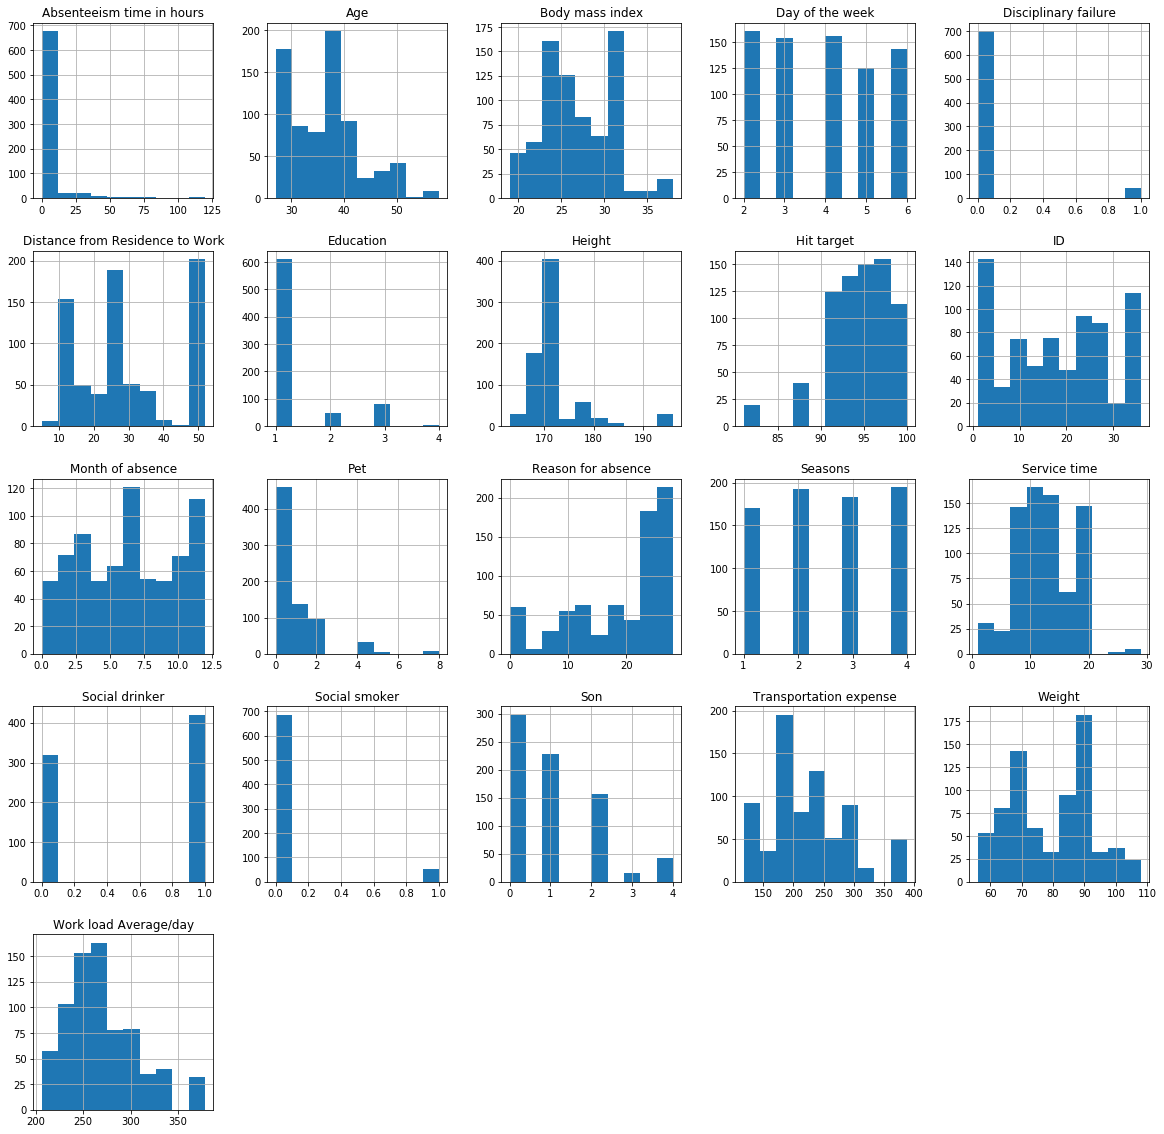

In [9]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e2cd29488>,
 'caps': [<matplotlib.lines.Line2D at 0x20e2cd29f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e2cd20cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x20e2cd2ea88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e2cd2efc8>],
 'means': []}

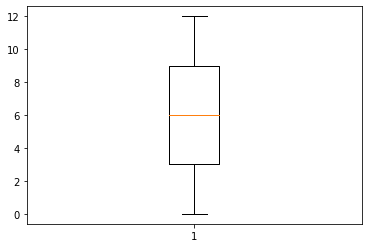

In [12]:
plt.boxplot(df['Month of absence'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e2ccf4dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x20e2cd8ad08>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e2cd82ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x20e2cd8ae88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e2cd91d48>],
 'means': []}

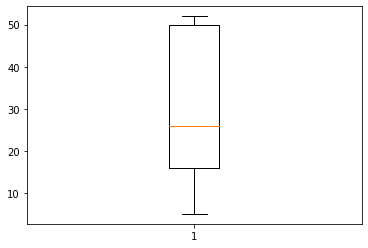

In [13]:
plt.boxplot(df['Distance from Residence to Work'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e2cde5d88>,
 'caps': [<matplotlib.lines.Line2D at 0x20e2cde5f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e2cde5608>],
 'medians': [<matplotlib.lines.Line2D at 0x20e2cdece88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e2cdecf08>],
 'means': []}

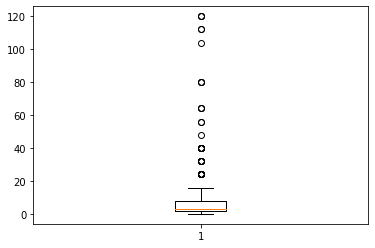

In [14]:
plt.boxplot(df['Absenteeism time in hours'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x20e2ce4d108>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20e2ce40fc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x20e2ce4db08>,
 'cbars': <matplotlib.collections.LineCollection at 0x20e2ce17288>}

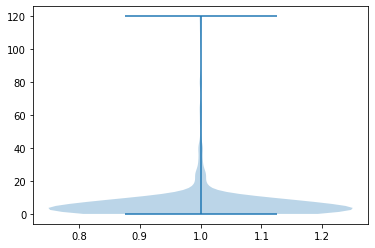

In [15]:
plt.violinplot(df['Absenteeism time in hours'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x20e2caf3b08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x20e2ce40e08>,
 'cmins': <matplotlib.collections.LineCollection at 0x20e2caf3988>,
 'cbars': <matplotlib.collections.LineCollection at 0x20e2caef6c8>}

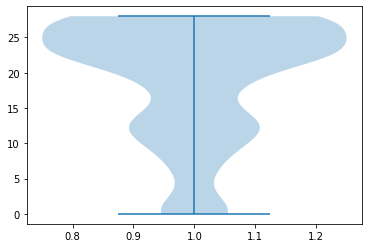

In [16]:
plt.violinplot(df['Reason for absence'])

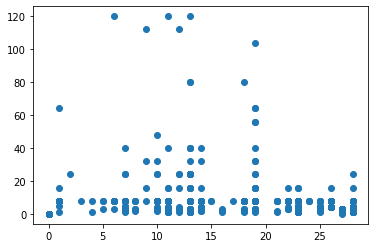

In [17]:
plt.scatter('Reason for absence','Absenteeism time in hours',data=df)

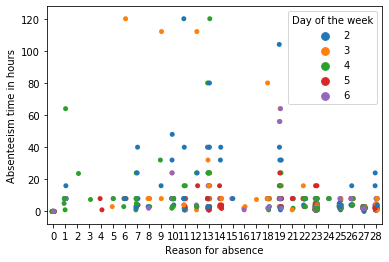

In [19]:
sns.stripplot('Reason for absence','Absenteeism time in hours',hue='Day of the week',data=df)

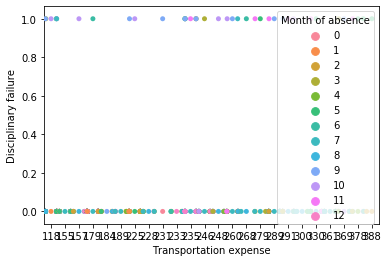

In [20]:
sns.swarmplot('Transportation expense','Disciplinary failure',hue='Month of absence',data=df)

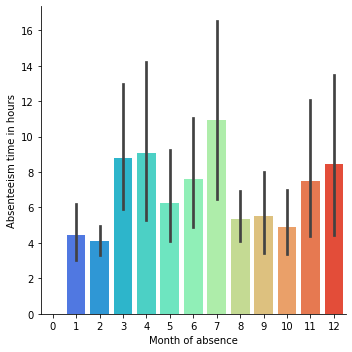

In [22]:
sns.catplot('Month of absence','Absenteeism time in hours',data=df,palette='rainbow',kind='bar')

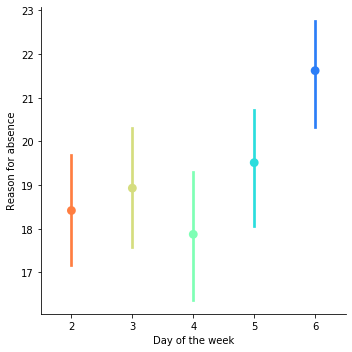

In [24]:
sns.catplot('Day of the week','Reason for absence',data=df,palette='rainbow_r',kind='point')

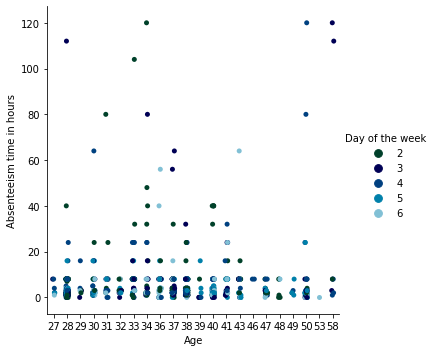

In [26]:
sns.catplot('Age','Absenteeism time in hours',hue='Day of the week',data=df,palette='ocean',kind='strip')

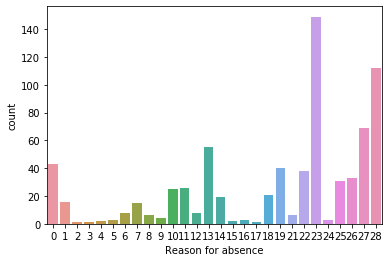

In [27]:
sns.countplot(df['Reason for absence'])

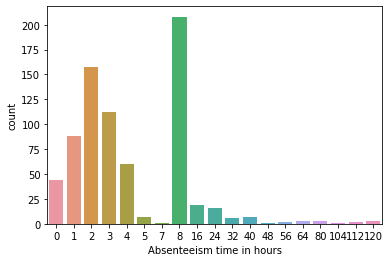

In [28]:
sns.countplot(df['Absenteeism time in hours'])

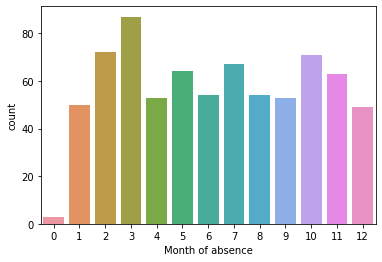

In [31]:
sns.countplot(df['Month of absence'])

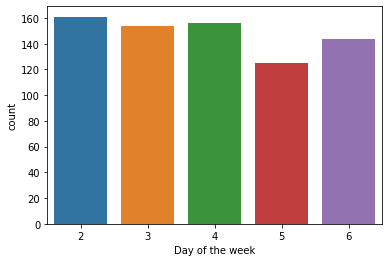

In [30]:
sns.countplot(df['Day of the week'])

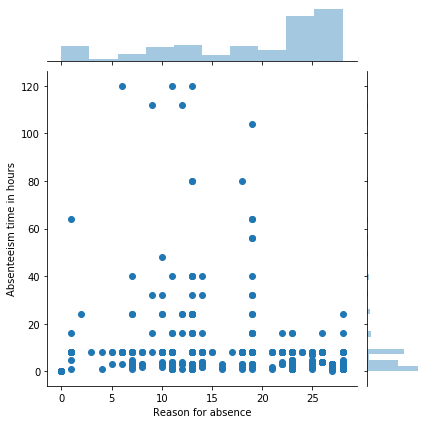

In [32]:
sns.jointplot('Reason for absence','Absenteeism time in hours',data=df,kind='scatter')

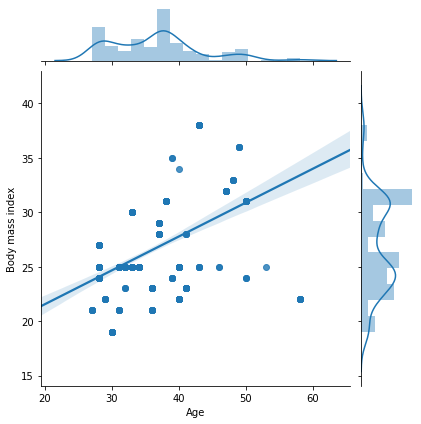

In [35]:
sns.jointplot('Age','Body mass index',data=df,kind='reg')

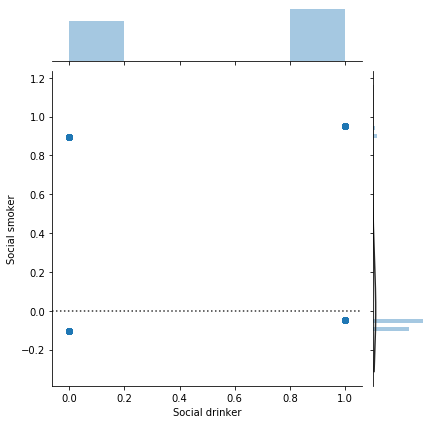

In [36]:
sns.jointplot('Social drinker','Social smoker',data=df,kind='resid')

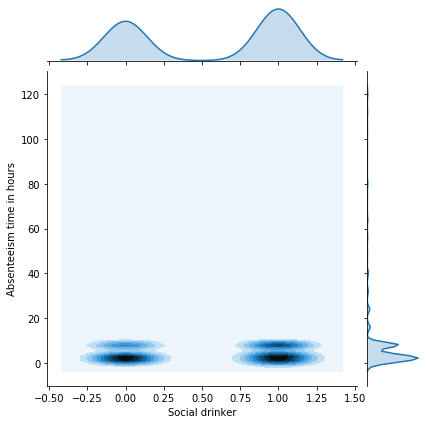

In [37]:
sns.jointplot('Social drinker','Absenteeism time in hours',data=df,kind='kde')

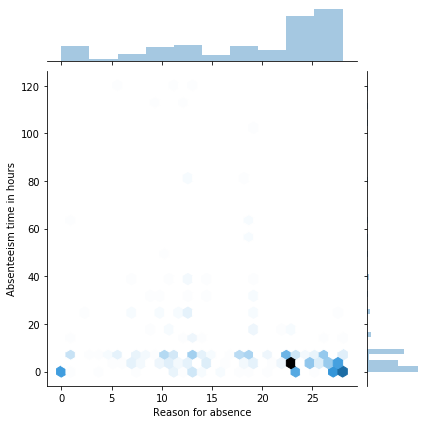

In [38]:
sns.jointplot('Reason for absence','Absenteeism time in hours',data=df,kind='hex')

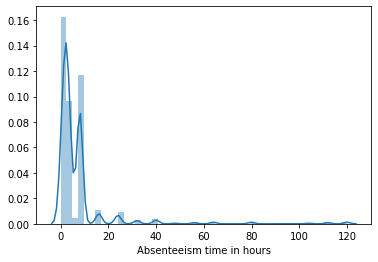

In [39]:
sns.distplot(df['Absenteeism time in hours'])

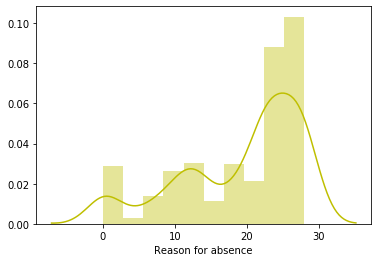

In [40]:
sns.distplot(df['Reason for absence'],color='y')

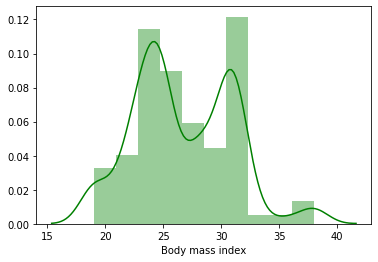

In [41]:
sns.distplot(df['Body mass index'],bins=10,color='g')

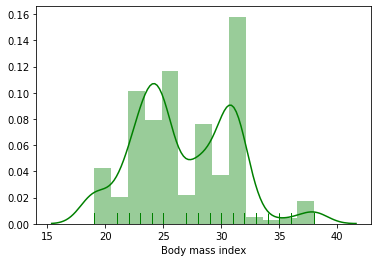

In [42]:
sns.distplot(df['Body mass index'],rug=True,color='g')

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Hit target', 'Disciplinary failure',
        'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
        'Height', 'Body mass index', 'Absenteeism time in hours'],
       dtype='object'),
 dtype('float64'): Index(['Work load Average/day'], dtype='object')}

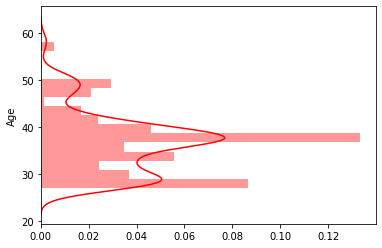

In [44]:
sns.distplot(df['Age'],color='r',vertical=True)

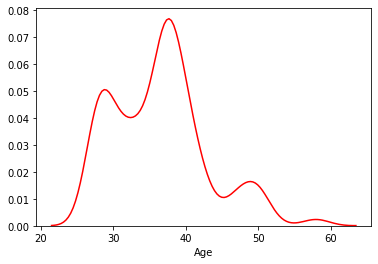

In [45]:
sns.distplot(df['Age'],color='r',hist=False)

In [9]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

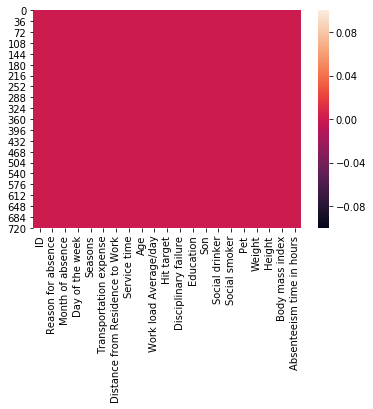

In [10]:
sns.heatmap(df.isnull())

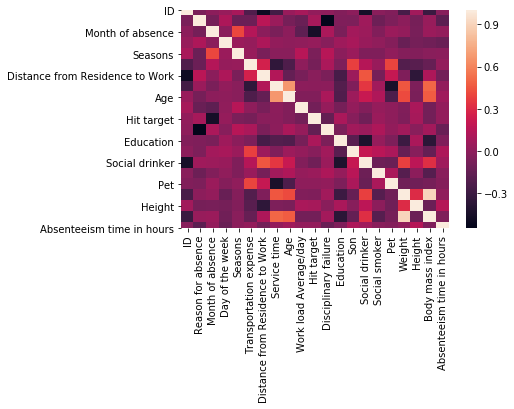

In [11]:
sns.heatmap(df.corr())

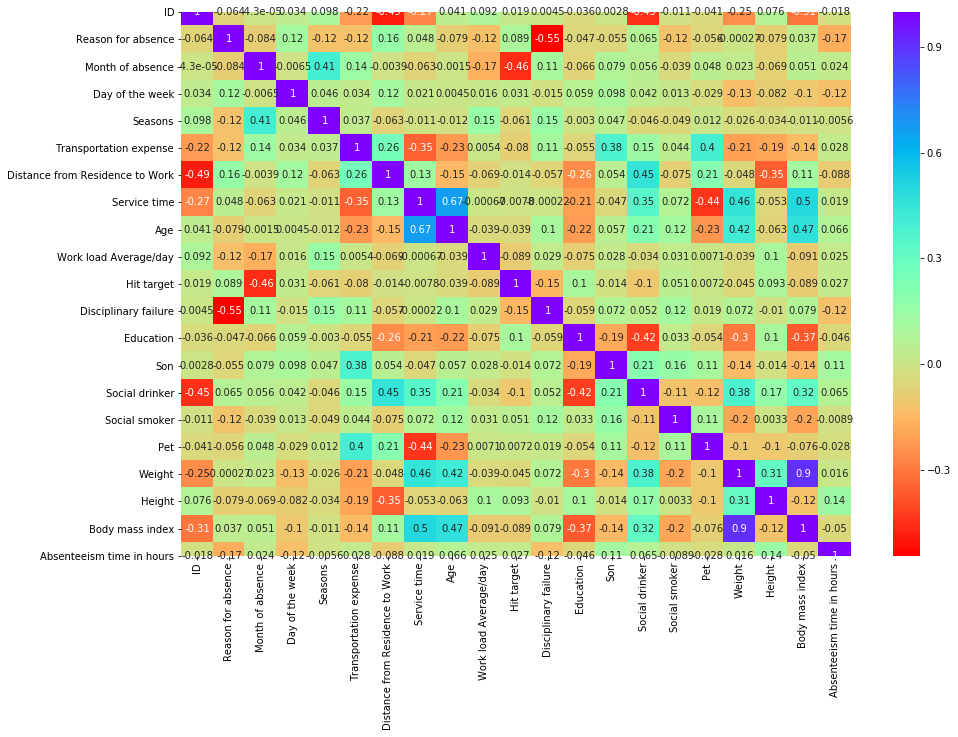

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='rainbow_r',annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [14]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [15]:
x=df.iloc[:,0:-1].values
x.shape

(740, 20)

In [16]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [17]:
y=df.iloc[:,-1].values.reshape(-1,1)
y.shape

(740, 1)

In [18]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),SVC()]

In [19]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_values=accuracy_score(y_test,predm)
        print('Accuracy score corresponing to random state',r_state,'is:',accu_values)
        if accu_values>max_acc_score:
            max_acc_score=accu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_acc_score,'and models is',final_model)

Accuracy score corresponing to random state 40 is: 0.3707865168539326
Accuracy score corresponing to random state 40 is: 0.34269662921348315
Accuracy score corresponing to random state 40 is: 0.4157303370786517
Accuracy score corresponing to random state 40 is: 0.4101123595505618
Accuracy score corresponing to random state 40 is: 0.449438202247191
Accuracy score corresponing to random state 41 is: 0.4044943820224719
Accuracy score corresponing to random state 41 is: 0.4101123595505618
Accuracy score corresponing to random state 41 is: 0.42696629213483145
Accuracy score corresponing to random state 41 is: 0.4606741573033708
Accuracy score corresponing to random state 41 is: 0.47752808988764045
Accuracy score corresponing to random state 42 is: 0.38202247191011235
Accuracy score corresponing to random state 42 is: 0.4044943820224719
Accuracy score corresponing to random state 42 is: 0.4157303370786517
Accuracy score corresponing to random state 42 is: 0.47191011235955055
Accuracy score c

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=51)

In [21]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5674157303370787
[[11  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  7  6  2  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1 25  9  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  4  4  9  4  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  4  3  4  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  6  2  1  0 45  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.50      0.37      0.42        19
           2       0.56      0.66      0.60        38
           3       0.35      0.38      0.36

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameter={'kernel':('linear','poly','rbf'),'C':range(1,10)}
grid=GridSearchCV(svc,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': range(1, 10),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'C': 1, 'kernel': 'rbf'}


In [24]:
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5674157303370787
[[11  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  7  6  2  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1 25  9  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  4  4  9  4  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  4  3  4  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  6  2  1  0 45  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.50      0.37      0.42        19
           2       0.56      0.66      0.60        38
           3       0.35      0.38      0.36

In [25]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.4556962  0.41176471 0.39455782 0.40140845 0.44285714]
0.4212568650209237
0.02387274364086289


In [26]:
from sklearn.externals import joblib

In [27]:
joblib.dump(svc,'AbsenteeismWork.obj')

['AbsenteeismWork.obj']